In [4]:
import json

with open('/mnt/c/Users/jimen/questions1/testdev_balanced_questions.json') as f:
   questions_dict = json.load(f)

# dict_keys(['semantic', 'entailed', 'equivalent', 'question', 'imageId', 
#      'isBalanced', 'groups', 'answer', 'semanticStr', 'annotations', 'types', 'fullAnswer'])

for key in questions_dict:
    dict = questions_dict[key]
    print(dict['semanticStr'])


select: snowboard (1)->exist: ? [0]->select: fence (-) ->exist: ? [2]->or:  [1, 3]
select: person (0)->query: pose [0]
select: snow pants (4)->verify color: green [0]
select: snow (2)->verify: bright [0]->verify color: white  [0]->and:  [1, 2]
select: person (0)->relate: _,in front of,o (3) [0]->query: name [1]
select: watch (4)->query: shape [0]
select: person (14,7)->same: gender [0]
select: wine (3)->relate: _,filled with,s (2) [0]->query: name [1]
select: person (14)->filter activity: posing [0]->relate: person,holding,o (7) [1]->query: name [2]
select: dress (12)->filter color: blue [0]->verify size: large [1]->verify: long sleeved  [1]->and:  [2, 3]
select: plate (8)->relate: food,on,s (9) [0]->query: name [1]
select: spoon (4)->filter color: silver [0]->query: hposition [1]
select: table (2)->filter material: metal [0]->exist: ? [1]->select: lamp (-) ->filter material: metal [3]->exist: ? [4]->or:  [2, 5]
select: plate (8)->relate: meat,on,s (10) [0]->query: name [1]
select: nap

select: desk (3)->verify color: white [0]
select: license plate (1)->query: color [0]
select: man (3)->query: pose [0]
select: vehicle (4)->filter size: large [0]->choose vposition: top|bottom [1]
select: building (9)->relate: road,near,s (10) [0]->query: color [1]
select: scene->query: place [0]
select: artwork (7)->query: color [0]
select: sky (5)->filter weather: cloudy [0]->choose: ugly|beautiful [1]
select: artwork (7)->relate: _,on,o (2) [0]->query: name [1]
select: nut (4)->filter size: small [0]->query: hposition [1]
select: scene->verify weather: cloudy [0]
select: lawn (11)->relate: sign,standing in,s (4) [0]->query: name [1]
select: gravel (10)->filter material: asphalt [0]->relate: _,sitting atop,s (0) [1]->query: name [2]
select: bench (1)->relate: _,sitting beside,s (2) [0]->query: name [1]
select: scene->query: weather [0]
select: sky (14)->relate: _,covered by,s (12) [0]->query: name [1]
select: racket (5)->relate: person,holding,s (7) [0]->choose rel: umpire,to the lef

Created: 5/19/2020
Author: Jimena Guallar-Blasco
This program takes the GQA testdev_balanced_questions file and creates subplots (barcharts) for the k most frequent operations and their most frequent objects. K can be changed to any arbritary value (within the maximum number of operations). The number of values displayed per subplot can also be specified; specifying too many values per subplot can make it hard to read subplots. Subplots with empty x labels represent the frequency of a space or a blank. 

In [36]:
# START OF MAIN CODE #
import operator
import json

with open('/mnt/c/Users/jimen/questions1/testdev_balanced_questions.json') as f:
   questions_dict = json.load(f)

groupings_list = [] # Relates the operations to the objects
operations_dict = {} # Dictionary of operations
objects_dict = {} # Dictionary of operations

# Creating dictionary of operations, key is operation value is frequency
for key in questions_dict:
    dict = questions_dict[key]
    line = dict['semanticStr'].split(">")
    for item in line:
        group = item.split(":")
        group[1] = group[1].split(" ")
        groupings_list.append(group)
    for item in groupings_list:
        #print(item[0])
        if item[0] in operations_dict.keys():
            operations_dict[item[0]] += 1
        else:
            operations_dict[item[0]] = 1

#print(operations_dict)

# Sorting dictionary of operations (most frequent to least frequent)
operations_sorted_list = sorted(operations_dict.items(), key=operator.itemgetter(1), reverse=True)

#print(operations_sorted_list)


In [37]:
#import json

with open('/mnt/c/Users/jimen/questions1/testdev_balanced_questions.json') as f:
   questions_dict = json.load(f)

# Creating dictionary of objects, key is object value is frequency
for key in questions_dict:
    dict = questions_dict[key]
    line = dict['semanticStr'].split(">")
    for item in line:
        group = item.split(":")
        group[1] = group[1].split(" ")
        if group[1][1] in objects_dict.keys():
            objects_dict[group[1][1]] += 1
        else:
            objects_dict[group[1][1]] = 1
            
#print(objects_dict)

# Sorting dictionary of objects (most frequent to least frequent)
objects_sorted_list = sorted(objects_dict.items(), key=operator.itemgetter(1), reverse=True)

#print(objects_sorted_list) 


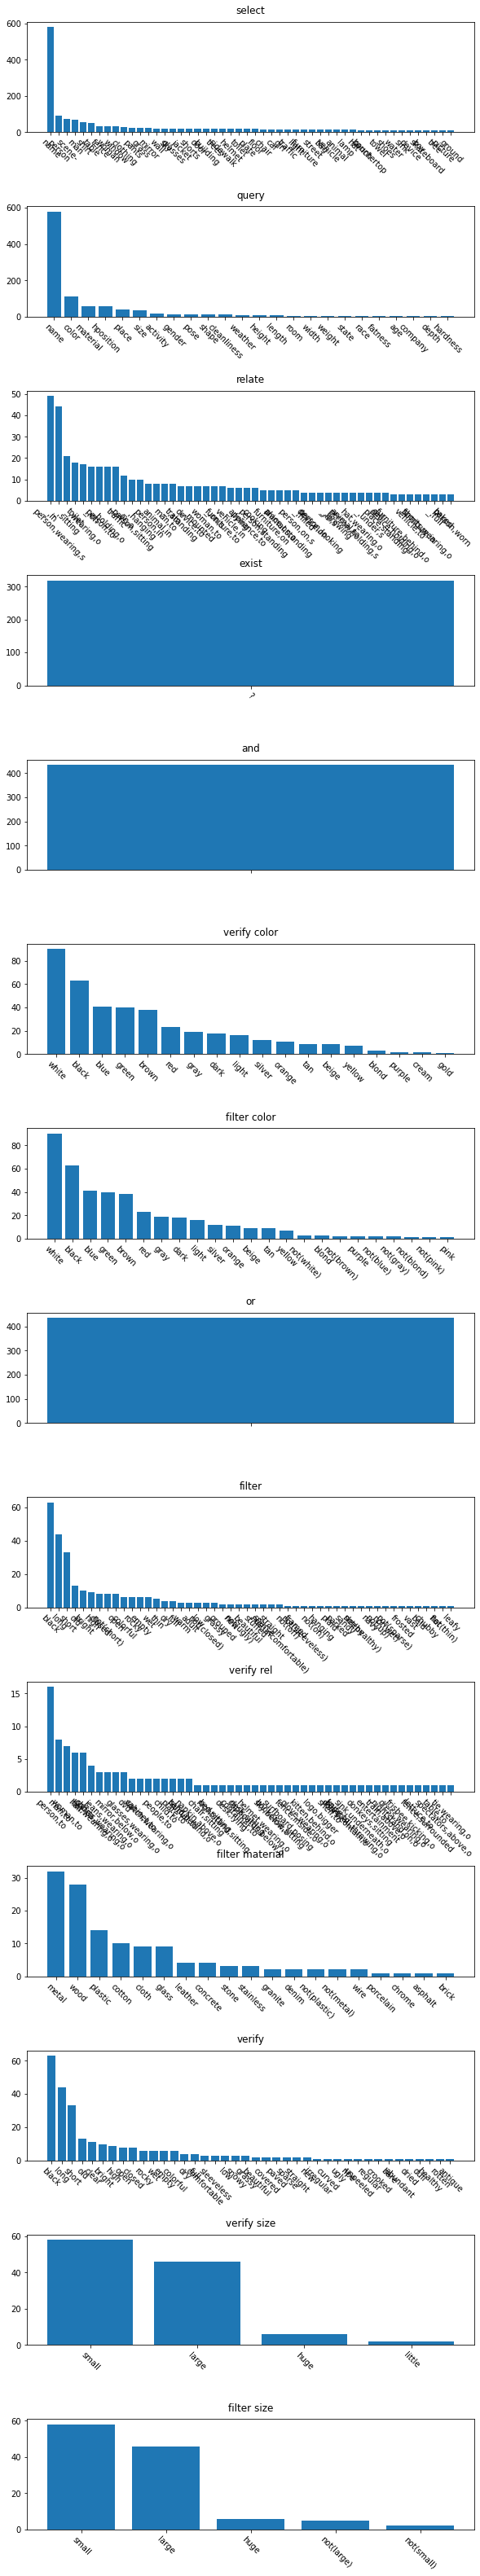

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec

k = 15 # Number of desired subplots
i = 1 # Subplot counter
m = 50 # Number of values displayed in subplot

# Setting up subplots
fig, axs = plt.subplots(k-1)
fig.set_size_inches(10, k*3)
fig.tight_layout(pad=7)

# Creating and filling subplots
for item in operations_sorted_list:
   
    current_plot_objects = {}
    x_val = []
    y_val = []
    current_operation = item[0]
    
    # Relating current operation to object 
    for operation in groupings_list:
        if current_operation == operation[0]:
            current_object = operation[1][1]
            current_plot_objects[current_object] = objects_dict[current_object]
            current_plot_objects_sorted = sorted(current_plot_objects.items(), key=operator.itemgetter(1), reverse=True)
    
    h = 0 
    # Creating lists for subplots and creating subplots
    for val in current_plot_objects_sorted:
        if val[1] != 0:
            h+= 1
            x_val.append(val[0])
            y_val.append(val[1])
        if h == m: 
            break
    axs[i-1].bar(x_val, y_val)
    axs[i-1].set_title(str(current_operation), pad=10)
    
    # Rotating subplot x labels (-45 degrees)
    for tick in axs[i-1].get_xticklabels():
        tick.set_rotation(-45)

    i += 1
    if i == k:
        break
       